Enter the x-coordinate of line number 1 :
-12
Enter the y-coordinate of line number 1 :
13
Enter the x-coordinate of line number 2 :
0
Enter the y-coordinate of line number 2 :
13
Enter the x-coordinate of line number 3 :
12
Enter the y-coordinate of line number 3 :
13
Enter the rms value of line-to-ground voltage(in kV) :242.487
Enter the Number of subconductors in buldle :2
Enter the diameter of a subconductor in bundle(in meter) :0.0318
Enter the bundle spacing(in meter) :0.4572


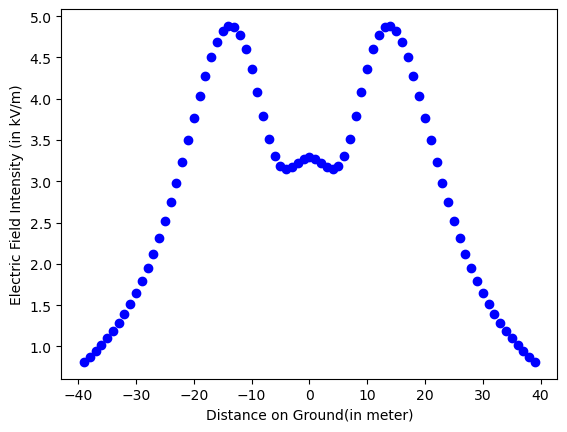

<Figure size 640x480 with 0 Axes>

In [5]:
import math
import numpy
import numpy as np
import matplotlib.pyplot as plt
lcs=numpy.empty(shape=(3, 2), dtype=float)

for i in range(3):
    print("Enter the x-coordinate of line number", i+1, ":")
    lcs[i][0]=float(input())
    print("Enter the y-coordinate of line number", i+1, ":")
    lcs[i][1]=float(input())

V = float(input("Enter the rms value of line-to-ground voltage(in kV) :"))
N = int(input("Enter the Number of subconductors in buldle :"))
d = float(input("Enter the diameter of a subconductor in bundle(in meter) :"))
r = float(d/2)
B = float(input("Enter the bundle spacing(in meter) :"))
R = float(B/(2*math.sin(math.pi/N)))
S = float(lcs[2][0]-lcs[1][0])
Req = float((N*r*(R**(N-1)))**(1/N))
H = float(lcs[0][1])

mpcs = np.empty(79, dtype=float)


for l in range(79):
    mpcs[l]= -39+l
    
data = np.empty(79, dtype=float)

for k in range(79):
    D=np.array([0,0,0], dtype=float)

    for i in range(3):
        D[i]= float((((mpcs[k]-lcs[i][0])**2)+((0-lcs[i][1])**2))**(1/2))
    
    D_d=np.array([0,0,0], dtype=float)

    for i in range(3):
        D_d[i]= float((((mpcs[k]-lcs[i][0])**2)+((0+lcs[i][1])**2))**(1/2))
    
    P=numpy.empty(shape=(3, 3), dtype=float)


    for i in range(3):
        for j in range(3):
            if i==j:
                P[i][i]= float(math.log(2*H/Req))
            else:
                P[i][j]= float((1/2)*math.log((((lcs[i][0]-lcs[j][0])**2)+((lcs[i][1]+lcs[j][1])**2))/(((lcs[i][0]-lcs[j][0])**2)+((lcs[i][1]-lcs[j][1])**2))))

    M = np.linalg.inv(P)

    J=numpy.empty(3,dtype=float)
    K=numpy.empty(3,dtype=float)

    for i in range(3):
        J[i]= float((mpcs[k]-lcs[i][0])*(((D[i])**(-2))-((D_d[i])**(-2))))
        K[i]= float(((0-lcs[i][1])/((D[i])**2))-((0+lcs[i][1])/((D_d[i])**2)))



    J_h=np.array([0,0,0],dtype=float)
    K_v=np.array([0,0,0],dtype=float)

    for i in range(3):
        for j in range(3):
            J_h[i] = J_h[i]+(J[j]*M[j][i])
            K_v[i] = K_v[i]+(K[j]*M[j][i])

    Jh= float(((J_h[0]*J_h[0])+(J_h[1]*J_h[1])+(J_h[2]*J_h[2])-(J_h[0]*J_h[1])-(J_h[1]*J_h[2])-(J_h[2]*J_h[0]))**(1/2))
    Kv= float(((K_v[0]*K_v[0])+(K_v[1]*K_v[1])+(K_v[2]*K_v[2])-(K_v[0]*K_v[1])-(K_v[1]*K_v[2])-(K_v[2]*K_v[0]))**(1/2))

    data[k]=float(((((Jh*V)**2)+((Kv*V)**2))**(1/2)))
    
plt.xlabel('Distance on Ground(in meter)')
plt.ylabel('Electric Field Intensity (in kV/m)')
plt.plot(mpcs, data,'bo')
plt.show()
plt.savefig("egrh.jpg", dpi=400)